In [1]:

import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import norm, skew 

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [2]:
train_df = pd.read_csv('D:/NotebooksDirectory/House_Prices/houses_train.csv')
test_df = pd.read_csv('D:/NotebooksDirectory/House_Prices/houses_test.csv')

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# saving the Id columns
train_ID = train_df['Id']
test_ID = test_df['Id']

#dropping the Id columns from the dataframes
train_df.drop('Id', axis = 1, inplace = True)
test_df.drop('Id', axis = 1, inplace = True)

## Data Processing:

Text(0.5,1,'Before outlier removal')

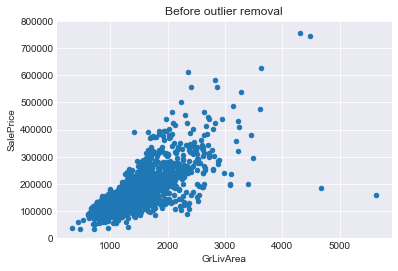

In [6]:
# detecting outliers
data = pd.concat([train_df['GrLivArea'], train_df['SalePrice']], axis=1)
data.plot.scatter(x = 'GrLivArea', y = 'SalePrice', ylim=(0,800000))
plt.title('Before outlier removal')

### Deleting outliers:

In [7]:

train_df.drop(train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<300000)].index, inplace = True)

Text(0.5,1,'After outlier removal')

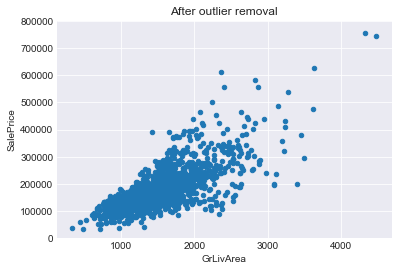

In [8]:
data = pd.concat([train_df['GrLivArea'], train_df['SalePrice']], axis=1)
data.plot.scatter(x = 'GrLivArea', y = 'SalePrice', ylim=(0,800000))
plt.title('After outlier removal')

### SalePrice transformation (to reduce skewness):

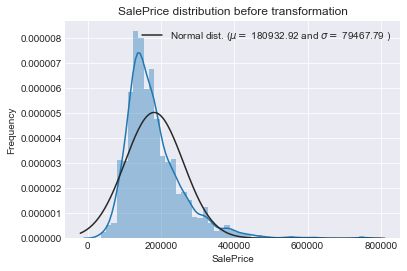

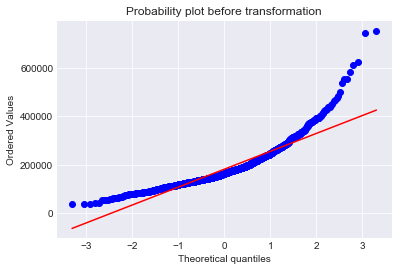

In [9]:
# plot the distribution
sns.distplot(train_df['SalePrice'] , fit=norm)

# get the average and standard deviation parameters used by the function
mu, sigma = norm.fit(train_df['SalePrice'])

# now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution before transformation')

# get the probability plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot = plt)
plt.title('Probability plot before transformation')
plt.show()

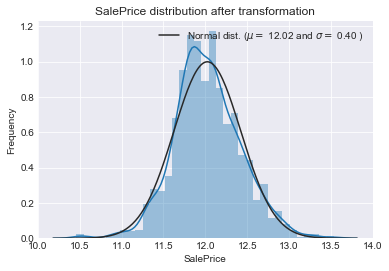

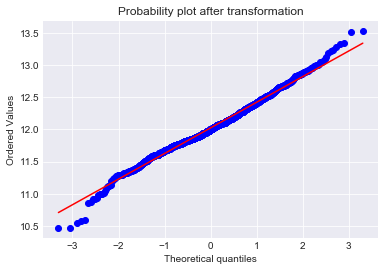

In [10]:
# using log transformations to transform the data
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

# plot the distribution
sns.distplot(train_df['SalePrice'] , fit=norm)

# get the average and standard deviation parameters used by the function
(mu, sigma) = norm.fit(train_df['SalePrice'])

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution after transformation')

# again get the probability plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot = plt)
plt.title('Probability plot after transformation')
plt.show()

### Feature engineering:

In [11]:
n_train = train_df.shape[0]
n_test = test_df.shape[0]
y_train = train_df['SalePrice'].values
all_data = pd.concat((train_df, test_df)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size shape is : {}".format(all_data.shape))

all_data size shape is : (2917, 79)


In [12]:
# dealing with missing data
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' : all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageQual,5.451
GarageCond,5.451
GarageFinish,5.451
GarageYrBlt,5.451


### Dealing with missing values (basically replacing most NaN's with 'None') :

In [13]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

In [14]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

In [15]:
all_data["Fence"] = all_data["Fence"].fillna("None")

In [16]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [17]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [18]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [19]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [20]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [21]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [22]:
all_data.drop(['Utilities'], axis = 1, inplace = True)

In [23]:
all_data['Functional'] = all_data['Functional'].fillna('Typ')

In [24]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [25]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [26]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
print(all_data['Exterior1st'].mode()[0])
print(all_data['Exterior2nd'].mode()[0])

VinylSd
VinylSd


In [27]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [28]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [29]:
all_data["Alley"] = all_data["Alley"].fillna("None")

In [30]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [31]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [32]:
# check for missing data
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


### A bit of feature engineering:

In [33]:
for col in ('MSSubClass', 'OverallCond', 'YrSold', 'MoSold'):
    all_data[col] = all_data[col].astype(str)

In [34]:
# you're actually just assigning ordinals to the corresponding values
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    all_data[c] = lbl.fit_transform(list(all_data[c].values)) 

# shape        
print('Shape of all_data is : {}'.format(all_data.shape))

Shape of all_data is : (2917, 78)


In [35]:
# since the total square feet area of the house is very correlated to SalePrice, we're going to create a new feature called
# TotalSF which is the sum of all the area related features
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

### Reducing the skewness of the features:

In [36]:

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
print("\nSkew in numerical features (we should be careful both about positive and negative skew) : \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features (we should be careful both about positive and negative skew) : 



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945


In [37]:
skewness = skewness[abs(skewness.Skew) > 0.75]
print("There are {} skewed numerical features to Box Cox transform.".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 36 skewed numerical features to Box Cox transform


In [38]:
# getting dummy variables
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [39]:
# getting new training and testing dataframes
train_df = all_data[:n_train]
test_df = all_data[n_train:]
train_df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,11.693,11.686,0.000,1,3,1.820,1.541,11.170,0.000,2,...,0,0,0,0,0,0,0,0,0,1
1,12.792,0.000,0.000,1,3,1.820,0.730,12.063,0.000,0,...,0,0,0,0,0,0,0,0,0,1
2,11.892,11.725,0.000,1,3,1.820,1.194,10.200,0.000,2,...,0,0,0,0,0,0,0,0,0,1
3,12.014,11.354,0.000,1,3,0.730,1.541,8.274,0.000,0,...,0,0,0,0,0,0,0,0,0,1
4,12.511,12.271,0.000,1,4,1.820,0.000,10.971,0.000,2,...,0,0,0,0,0,0,0,0,0,1


In [40]:
test_df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
1458,11.819,0.000,0.000,1,2,1.820,1.541,10.105,7.397,5,...,0,0,0,0,0,0,0,0,0,1
1459,12.944,0.000,0.000,1,3,1.820,1.541,11.901,0.000,0,...,0,0,0,0,0,0,0,0,0,1
1460,11.916,11.151,0.000,1,3,1.820,1.541,11.477,0.000,2,...,0,0,0,0,0,0,0,0,0,1
1461,11.910,11.063,0.000,1,3,1.820,1.541,10.750,0.000,2,...,0,0,0,0,0,0,0,0,0,1
1462,12.834,0.000,0.000,1,2,1.820,1.541,8.720,0.000,0,...,0,0,0,0,0,0,0,0,0,1


# Modelling and Predicting:

In [41]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

### We're going to test 4 different estimators: Lasso, Ridge, Elastic Net and XgBoost regression.

In [42]:
#Validation function
def rmsle_cv(model):
    kf = KFold(5, shuffle=True, random_state=42).get_n_splits(train_df.values)
    rmse= np.sqrt(-cross_val_score(model, train_df.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [43]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [44]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [45]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [46]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [47]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1103 (0.0072)



In [48]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1102 (0.0072)



In [49]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1780 (0.0067)



In [50]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1159 (0.0078)



### Creating an average base models class:

In [51]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    def fit(self, x, y):
        self.models_ = [clone(z) for z in self.models]
        
        for model in self.models_:
            model.fit(x, y)
            
        return self
    
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [52]:
averaged_models = AveragingModels(models = (lasso, ENet, KRR, model_xgb))

score = rmsle_cv(averaged_models)
print("Stacked models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Stacked models score: 0.1138 (0.0077)



### Adding a meta learner to the stack:

In [53]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)
    
    

In [54]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, model_xgb, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1089 (0.0072)


In [55]:
# again, a scoring function
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

### Final prediction:

In [56]:
stacked_averaged_models.fit(train_df.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train_df.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test_df.values))
print(rmsle(y_train, stacked_train_pred))

0.09375845861109901


In [57]:
model_xgb.fit(train_df, y_train)
xgb_train_pred = model_xgb.predict(train_df)
xgb_pred = np.expm1(model_xgb.predict(test_df))
print(rmsle(y_train, xgb_train_pred))

0.0785165142425036


In [58]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.80 +
               xgb_train_pred*0.20 ))

RMSLE score on train data:
0.08940928948457488


In [59]:
#the coefficients 0.80 and 0.20 come from Bayesian Optimization
ensemble = stacked_pred*0.80 + xgb_pred*0.20

In [60]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)